### Demo Environment Layers

In [1]:
# conda install altair -c conda-forge
# conda install pyvista -c conda-forge

In [1]:
import commsim
commsim.set_loglevel("DEBUG")

In [2]:
import altair as alt
import numpy as np

In [3]:
N = 100
M = 100

layer1 = commsim.Linear((N, M), minval=0, maxval=1, angle=45)
layer2 = commsim.Linear((N, M), minval=0, maxval=1, angle=90)
layer3 = commsim.Gaussian(shape=(N, M), peaks=30, minval=0, maxval=1, decay=10.0, seed=12345)

In [4]:
alt.concat(
    layer1.draw(),
    layer2.draw(),
    layer3.draw(),
)

alt.ConcatChart(...)

In [5]:
joint = (layer1 + layer2 + layer3)
joint.draw()

alt.ConcatChart(...)

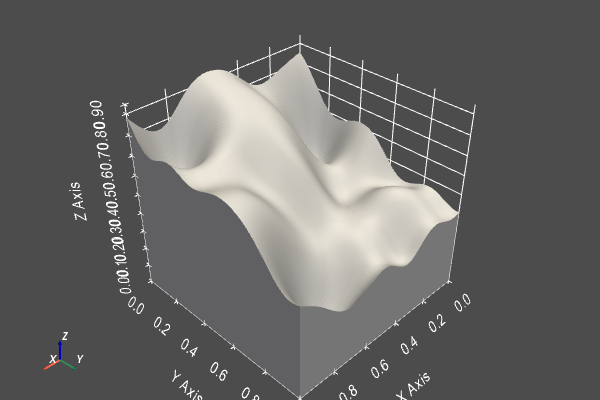

[(2.395842992436437, 2.395842992436437, 2.3673314767454787),
 (0.5, 0.5, 0.47148848430904167),
 (0.0, 0.0, 1.0)]

In [6]:
import pyvista as pv

# get data as numpy arrays
x = joint.data.x.values.reshape(100, 100)
y = joint.data.y.values.reshape(100, 100)
z = joint.data.z.values.reshape(100, 100)

# create a grid object
struct = pv.StructuredGrid(x, y, z)

# extend to a bottom depth to create a volume
top = struct.points.copy()
bottom = struct.points.copy()
bottom[:, -1] = 0.0
vol = pv.StructuredGrid()
vol.points = np.vstack((top, bottom))
vol.dimensions = [*struct.dimensions[0:2], 2]

# draw
vol.plot(clim=[-1, 1], show_grid=True, window_size=(600, 400))

# draw another way
# plotter = pv.Plotter(lighting="none")
# plotter.add_mesh(vol, color="white")
# light = pv.Light()
# light.set_direction_angle(50,30)
# plotter.add_light(light)
# plotter.show(title="commsim layer", window_size=(600, 400))

## TODO

In [7]:
from commsim.Environment import *

In [8]:

# SHAPE = (100, 100)
# env = Environment(
#     shape=SHAPE,
#     bioclims={
#         "min-temp": Linear(SHAPE, -5, 0, angle=90),
#         "mean-temp": Linear(SHAPE, 0, 10, angle=90),
#         "max-temp": Linear(SHAPE, 20, 50, angle=90),
#         "min-precip": Linear(SHAPE, 1, 10, angle=45),
#         "mean-precip": Linear(SHAPE, 3, 12, angle=45),
#     },
#     elevation=Gaussian(SHAPE, 10, 5),
#     elevation_coeff={
#         "min-temp": 0.5,
#         "mean-temp": 0.5,
#         "max-temp": 0.5,
#         "min-precip": 2.5,
#         "mean-precip": 2.5,
#     }
# )

# env.data
# # dataframe with [layer-name, elev-coeff, Layer]



In [8]:
class Environment:
    """
    Generates and stores a 3-d matrix of environment Layers.
    Environmental variables (bioclims) are added as simple gradients 
    with min,max values, and they are then transformed by elevation 
    which can apply a different coefficient to each variable 
    (how strongly it correlates with elevation).

    The environmental matrix is created during init and then there
    are draw functions available to visualize the array layers.
    
    Parameters:
    -----------
    ...
    """
    def __init__(
        self, 
        shape:Tuple[int,int]=(10,10),
        bioclims:Union[Dict[str,Layer], None]=None,
        elevation:Union[Dict[str,float], None]=None,
        ):
        
        self.shape = shape
        self.bioclims = bioclims
        self.elevation = elevation
        
    
    def __repr__(self):
        return "<Environment>"
              
    
env = Environment(
    shape=(20, 20),
    bioclims={
        'mean-temp': Linear((20,20), angle=90),
        'min-temp': Linear((20,20), minval=-5, maxval=0),
        'elevation': Gaussian((20, 20), peaks=10, decay=5),
    },
    elevation={
        
    }
)

In [25]:
elev = env.bioclims["elevation"]
env.bioclims['elevation'].draw()

alt.ConcatChart(...)

In [26]:
mean_temp = env.bioclims["mean-temp"]
env.bioclims['mean-temp'].draw()

alt.ConcatChart(...)

In [27]:
min_temp = env.bioclims["min-temp"]
env.bioclims["min-temp"].draw()

alt.ConcatChart(...)

In [28]:
# why are these plotting differently than when drawn individually?
alt.concat(
    mean_temp.draw(),
    min_temp.draw(),
    elev.draw(),
)

alt.ConcatChart(...)

In [29]:
joint = (mean_temp + min_temp + elev)
joint.draw()

alt.ConcatChart(...)